In [13]:
import numpy as np
import cv2
import os

X_train, y_train = [], []

train_url = "data/tsrd-train/"
for img in os.listdir(train_url):
    img_url = train_url + img
    img_cat = img.split("_")[0]
    
    img = cv2.imread(img_url)
    img = cv2.resize(img, (28, 28))
    img = img / 255.0
    
    X_train.append(img)
    y_train.append(img_cat)
    
X_train = np.array(X_train).reshape(-1, 28, 28, 1)
y_train = np.array(y_train)

In [10]:
X_test, y_test = [], []

test_url = "data/tsrd-test/"
for img in os.listdir(test_url):
    img_url = test_url + img
    img_cat = img.split("_")[0]
    
    img = cv2.imread(img_url)
    img = cv2.resize(img, (28, 28))
    img = img / 255.0
    
    X_test.append(img)
    y_test.append(img_cat)
    
X_test = np.array(X_test).reshape(-1, 28, 28, 1)
y_test = np.array(y_test)

In [15]:
print(f"Train data dims: {X_train.shape}")
print(f"Test data dims: {X_test.shape}")
print(f"Validation data dims: {X_val.shape}")

Train data dims: (12510, 28, 28, 1)
Test data dims: (5982, 28, 28, 1)


In [30]:
classes_len = len(np.unique(y_train))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 <a list of 58 Text xticklabel objects>)

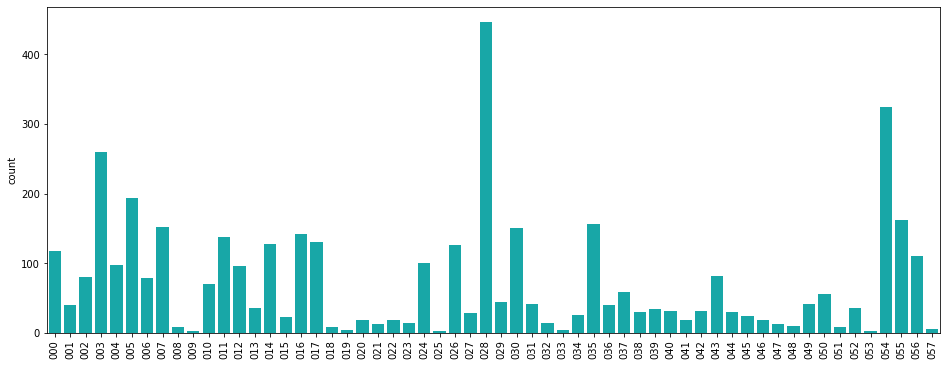

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(16, 6))
sns.countplot(y_train, color="c")
plt.xticks(rotation=90)

In [28]:
import keras
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    zca_whitening=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.15,
    channel_shift_range=0.1,
    fill_mode="nearest",
    horizontal_flip=False,
    vertical_flip=False)

R:\Work\Anacond\lib\site-packages\keras_preprocessing\image\image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [29]:
datagen.fit(X_train)

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as ly

model = Sequential([
    ly.Conv2D(6, (5,5), strides=(1,1), padding="valid", activation="relu",
              data_format="channels_last", input_shape=(28, 28, 3)),
    ly.MaxPooling2D((2, 2)),
    ly.Conv2D(16, (5, 5), activation="relu"),
    ly.MaxPooling2D((2, 2)),
    ly.Flatten(),
    ly.Dense(120, activation="relu"),
    ly.Dense(84, activation="relu"),
    ly.Dropout(0.2),
    ly.Dense(classes_len, activation="softmax")
])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 6)         456       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_3 (Dense)              (None, 84)                1

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

his = model.fit(X_train, y_train, batch_size=128, epochs=20,
               validation_data=())